In [1]:
pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
reviews = pd.read_csv('tourist_accommodation_reviews.csv')

reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [6]:
#Extracting the values from the dictionary and creating new columns within our dataframe

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['Review']]

In [7]:
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443


In [8]:
reviews['Location'].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [9]:
# Lets look at the number of hotel/restaurant in each location

size = reviews.groupby(["Location"])['Hotel/Restaurant name'].nunique()
size

Location
 Bang Tao Beach        6
 Cape Panwa           15
 Chalong              13
 Choeng Thale         34
 Kamala               32
 Karon                59
 Karon Beach           4
 Kata Beach           59
 Kata Noi Beach        2
 Kathu                11
 Koh Kaew              3
 Mai Khao             24
 Nai Harn              9
 Nai Thon              1
 Nai Yang             10
 Pa Khlok              1
 Patong              164
 Phuket Town          34
 Ratsada               1
 Rawai                39
 Sakhu                 1
 Talat Nuea            1
 Talat Yai             3
 Thalang District     12
 Wichit                4
Name: Hotel/Restaurant name, dtype: int64

In [10]:
#Selecting a location with over 30 hotels as required in this task
Phuket_Town = reviews.query('Location == " Phuket Town"')
Phuket_Town

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.9765,0.000,0.595,0.405
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.8908,0.000,0.547,0.453
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.8720,0.000,0.809,0.191
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.9035,0.000,0.762,0.238
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.5067,0.100,0.706,0.194
...,...,...,...,...,...,...,...,...,...
53442,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...,-0.8020,0.177,0.823,0.000
53443,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...,-0.6901,0.122,0.878,0.000
53444,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...,0.0258,0.039,0.919,0.041
53445,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...,0.7615,0.000,0.834,0.166


In [11]:
#Exploring the Hotel Name
Phuket_Town["Hotel/Restaurant name"].value_counts()

Surf and Turf by Soul Kitchen                         100
Papaya                                                100
Tiger Inn Restaurant                                  100
Savoy Patong                                          100
The Kitchen                                           100
Fuji Japanese Restaurant - Central Festival Phuket    100
Khaorang Breeze Restaurant                            100
MK Gold Restaurant                                    100
Salvatore's restaurant                                100
Red Onion                                             100
Mr.Coffee                                             100
Crust                                                 100
Gallery Cafe by Pinky                                 100
Natural Restaurant                                    100
Rider Cafe                                            100
La Gaetana                                            100
Eleven Two & Co.                                      100
Song Pee Nong 

In [12]:
#Droping the bottom four hotels

Phuket_Town = Phuket_Town.drop(Phuket_Town[Phuket_Town['Hotel/Restaurant name'] == 'Le Siam'].index)
Phuket_Town = Phuket_Town.drop(Phuket_Town[Phuket_Town['Hotel/Restaurant name'] == 'Honeymoon Thai Restaurant by Kenya'].index)
Phuket_Town = Phuket_Town.drop(Phuket_Town[Phuket_Town['Hotel/Restaurant name'] == 'The Cook'].index)
Phuket_Town = Phuket_Town.drop(Phuket_Town[Phuket_Town['Hotel/Restaurant name'] == 'Mor Mu Dong'].index)
Phuket_Town["Hotel/Restaurant name"].value_counts()

Surf and Turf by Soul Kitchen                         100
Gallery Cafe by Pinky                                 100
Tiger Inn Restaurant                                  100
Savoy Patong                                          100
The Kitchen                                           100
Fuji Japanese Restaurant - Central Festival Phuket    100
Khaorang Breeze Restaurant                            100
MK Gold Restaurant                                    100
Salvatore's restaurant                                100
Red Onion                                             100
Mr.Coffee                                             100
Crust                                                 100
Natural Restaurant                                    100
Beach Bar                                             100
Rider Cafe                                            100
La Gaetana                                            100
OSOT                                                  100
Suay Restauran

In [13]:
Phuket_Town

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.9765,0.000,0.595,0.405
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.8908,0.000,0.547,0.453
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.8720,0.000,0.809,0.191
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.9035,0.000,0.762,0.238
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.5067,0.100,0.706,0.194
...,...,...,...,...,...,...,...,...,...
53442,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...,-0.8020,0.177,0.823,0.000
53443,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...,-0.6901,0.122,0.878,0.000
53444,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...,0.0258,0.039,0.919,0.041
53445,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...,0.7615,0.000,0.834,0.166


In [14]:
Phuket_Town[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2983.000000,2983.000000,2983.000000,2983.000000
mean,0.634674,0.027332,0.752174,0.220494
std,0.433855,0.051199,0.125081,0.132077
min,-0.964600,0.000000,0.287000,0.000000
25%,0.557400,0.000000,0.670000,0.124000
50%,0.817600,0.000000,0.760000,0.210000
75%,0.915150,0.043000,0.840000,0.307000
max,0.990400,0.380000,1.000000,0.713000


<AxesSubplot:xlabel='compound', ylabel='Count'>

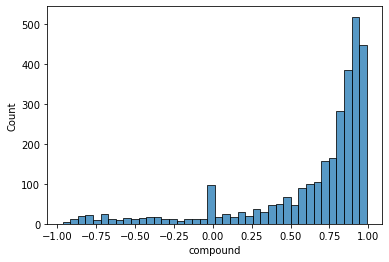

In [15]:
sns.histplot(Phuket_Town['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

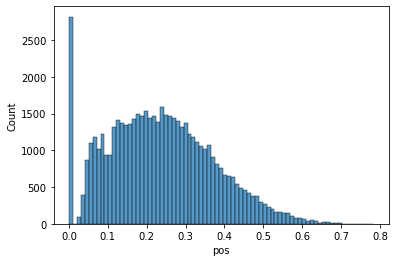

In [16]:
sns.histplot(reviews['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

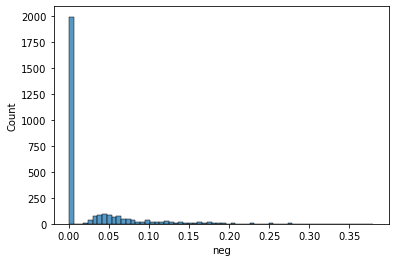

In [17]:
sns.histplot(Phuket_Town['neg'])

In [18]:
# Lets look at how many negative reviews we have per hotel/restaurant

(Phuket_Town['compound']<=0).groupby(Phuket_Town['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Archee Restaurant                                      6
Beach Bar                                             14
Blue Elephant Phuket                                   4
China Inn Cafe                                         6
Crust                                                  6
Dibuk restaurant                                      13
Eleven Two & Co.                                       9
Fuji Japanese Restaurant - Central Festival Phuket     5
Gallery Cafe by Pinky                                  6
Khaorang Breeze Restaurant                            10
Kopitiam by Wilai                                     10
La Gaetana                                             7
MK Gold Restaurant                                    21
Mee Ton Poe                                           10
Mr.Coffee                                              7
Natural Restaurant                                    20
OSOT                                                   3
Papaya   

In [19]:
# Calculate as percentage of total reviews

percent_negative = pd.DataFrame((Phuket_Town['compound']<=0).groupby(Phuket_Town['Hotel/Restaurant name']).sum()
                               /Phuket_Town['Hotel/Restaurant name'].groupby(Phuket_Town['Hotel/Restaurant name']).count()*100,
                               columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative 

,% negative reviews
Hotel/Restaurant name,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Surf and Turf by Soul Kitchen,5.000000
Fuji Japanese Restaurant - Central Festival Phuket,5.000000
Papaya,5.000000
Crust,6.000000
Gallery Cafe by Pinky,6.000000
China Inn Cafe,6.060606
Archee Restaurant,6.185567


In [20]:
Phuket_Town.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.9765,0.0,0.595,0.405
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.8908,0.0,0.547,0.453
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.8720,0.0,0.809,0.191
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.9035,0.0,0.762,0.238
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.5067,0.1,0.706,0.194


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

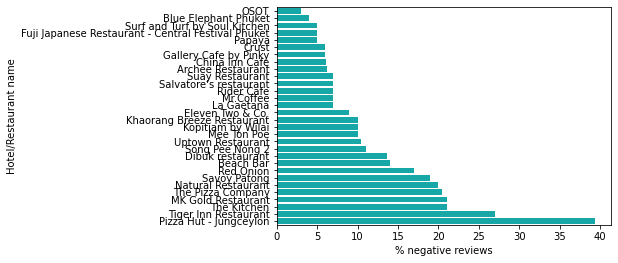

In [21]:
#We can also plot this as a horizontal barplot using seaborn
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [22]:
Phuket_Town.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,"Wow! What a find true TripAdvisor, so happy to...",0.9765,0.0,0.595,0.405
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,Best crossover Food i have ever had\r\nI was f...,0.8908,0.0,0.547,0.453
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant based on the reviews b...,0.8720,0.0,0.809,0.191
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Me and my husband went for dinner here last ni...,0.9035,0.0,0.762,0.238
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,French chef! Really concerned with the quality...,0.5067,0.1,0.706,0.194


In [23]:
# Creating a function to apply all of our data preprocessing steps which we can then use a corpus

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

In [24]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# Process the text data ready for wordcloud visualization, using the function i defined earlier 
# Focusing specifically on the hotel with the most negative reviews which is - Pizza Hut - Jungceylon

Phuket_Town['processed_review'] = Phuket_Town['Review'].apply(preprocess_text)



reviews_positive_subset = Phuket_Town.loc[(Phuket_Town['Hotel/Restaurant name']=="Pizza Hut - Jungceylon") & (Phuket_Town['compound']>0),:]



reviews_negative_subset = Phuket_Town.loc[(Phuket_Town['Hotel/Restaurant name']=="Pizza Hut - Jungceylon") & (Phuket_Town['compound']<=0),:]



reviews_positive_subset.head()  

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
53349,rn577142818,Reviewed 2 weeks ago,Phuket Town,Pizza Hut - Jungceylon,Ordered for delivery 2 pizza's one on this cru...,0.8171,0.043,0.760,0.197,"[order, deliveri, 2, pizza', one, crust, deep,..."
53350,rn573099054,"Reviewed April 13, 2018",Phuket Town,Pizza Hut - Jungceylon,Begin with the good. The restaurant looks grea...,0.9741,0.000,0.600,0.400,"[begin, good, restaur, look, great, clean, rea..."
53351,rn570301600,"Reviewed April 1, 2018",Phuket Town,Pizza Hut - Jungceylon,Not sure why the other reviews aern't great. M...,0.7984,0.098,0.690,0.212,"[sure, review, aern't, great, experi, excel, p..."
53355,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...,0.0258,0.039,0.919,0.041,"[went, pizza, hut, main, commerci, central, ev..."
53356,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...,0.7615,0.000,0.834,0.166,"[pizza, hut, five, star, restaur, teen, like, ..."


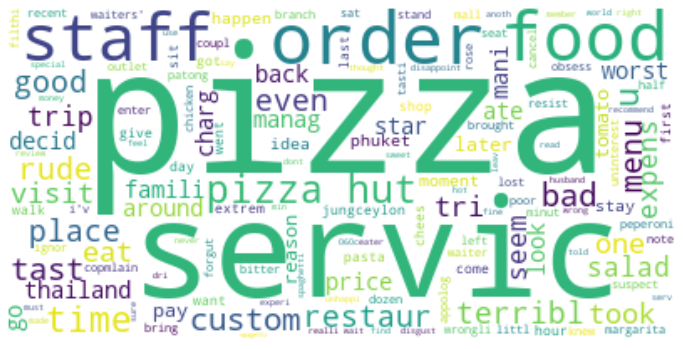

In [26]:
# Wordcloud of words from negative reviews by product

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud =  WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

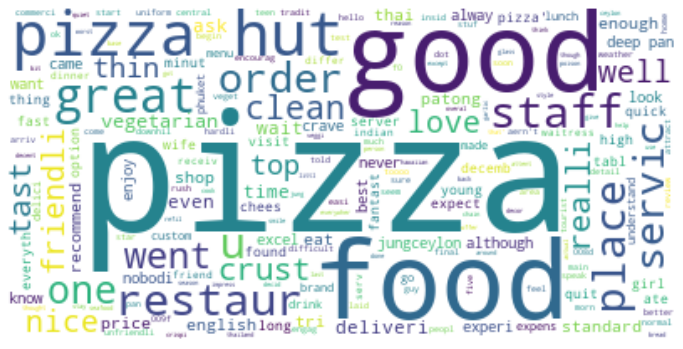

In [27]:
# Wordcloud of words from positive reviews by product

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud =  WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Use the nltk FreqDist and them tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

  pizza    good    food     hut   great restaur   staff    like   place   order 
     91      36      35      34      19      17      17      17      16      15 


In [29]:
# Use the nltk FreqDist and them tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

 pizza servic  order   food    hut  staff   time   like   tast    bad 
    47     19     14     13     12     12     10      9      8      8 


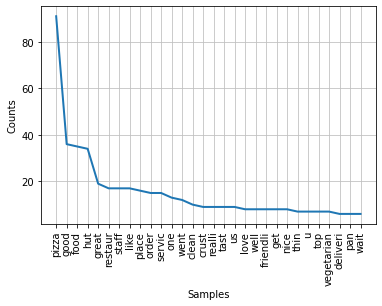

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
pos_freqdist.plot(30)

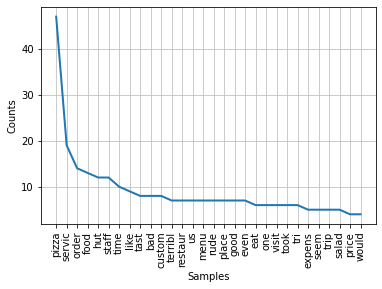

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
neg_freqdist.plot(30)